# sklearn
https://machine-learning-python.kspax.io/Introduction/intro.html


# load Data(X->Y)

In [485]:
import pymongo
client=pymongo.MongoClient('localhost',27017,username="j122085",password="850605")
client.rawData.collection_names()
collection=client.rawData.wowprimediendata
data=list(collection.find({"avgDailyCustomer":{"$gte":0},"avgDailyNet":{"$gte":0},"costPower_Analyze":{"$gte":0}}))

In [486]:
import numpy as np
def zscore(x, axis = None):
    x=np.array(x)
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [503]:
set([i["Called"] for i in data])

{'CooK BEEF!',
 'hot 7',
 'ita義塔',
 '乍牛',
 '原燒',
 '品田牧場',
 '夏慕尼',
 '沐越',
 '王品',
 '石二鍋',
 '聚',
 '舒果',
 '莆田',
 '藝奇',
 '陶板屋',
 '青花驕',
 '麻佬大',
 'ＴＡＳＴｙ'}

In [487]:
import numpy as np

Calls=set(i["Called"] for i in data)
for Call in Calls:
    mean=np.mean([i["avgDailyCustomer"] for i in data if i["Called"]==Call and 'avgDailyCustomer' in i])
    if not np.isnan(mean):
        for j in data:
            if j["Called"]==Call and 'avgDailyCustomer' in j:
#                 if j["avgDailyCustomer"]>mean*1.15:
#                     j['type']="good"
#                 elif j["avgDailyCustomer"]<mean*0.85:
#                     j['type']="bad"
#                 else:
#                     j['type']="normal"
                if j["avgDailyCustomer"]>mean*1.1:
                    j['type']=1
                elif j["avgDailyCustomer"]<mean*0.9:
                    j['type']=3
                else:
                    j['type']=2
            if 'avgDailyCustomer' in j:
                aC=j["avgDailyNet"]/j["avgDailyCustomer"]
                if aC<290:
                    j['typeP']="低"
                elif aC<450:
                    j['typeP']="中"
                elif aC<800:
                    j['typeP']="中高"
                else:
                    j['typeP']="高"



#用來預測的X 產生
myX=[[i['costPower_Analyze'],
  i['Nhuman_Analyze'],
  i['NbusStation_Analyze'],
  i['NconStore_Analyze'],
  i['Nstar_Analyze'],
  i['Nmc_Analyze'],
  i['Nken_Analyze'],
  i['Nwa_Analyze']
  ] for i in data if i['typeP']=="低"]

# from sklearn import preprocessing
# X=preprocessing.scale(X)
x=[]
for i in range(len(myX[0])):
    x.append(zscore(np.array(myX).T[i]))
myX=np.array(x).T




#連續型Y 產生
myY=[i['avgDailyCustomer'] for i in data if i['typeP']=="低"]

#分類用類型Y2 產生
myY2=[i['type'] for i in data if i['typeP']=="低"]
# i['avgDailyNet'],


In [340]:
len(myY2)

62

In [343]:
ndata=len(myX)
target_names=['good','normal','bad']

# 分類 (SVM)

In [344]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# 產生SVC分類器
classifier = svm.SVC(gamma=2, C=1)
# classifier = svm.SVC(kernel="linear", C=0.025)

#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#訓練
classifier.fit(myX[:ndata*2 // 3], myY2[:ndata*2 // 3])

expected = myY2[ndata*2 // 3:] #正確答案
predicted = classifier.predict(myX[ndata*2 // 3:]) #預測結果
accuracy=list(predicted==expected)#回傳true or false的list
print("正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率

正確率：0.3333333333333333


In [ ]:
classifier

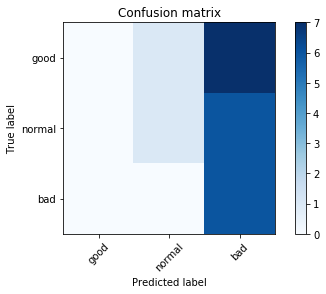

Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         8
          2       0.50      0.14      0.22         7
          3       0.32      1.00      0.48         6

avg / total       0.26      0.33      0.21        21




D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [345]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


    
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))
plt.show()

print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))

# 線性分類器

In [347]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(myX[:ndata*2 // 3], myY2[:ndata*2 // 3])
expected = myY2[ndata*2 // 3:] #正確答案
predicted = clf1.predict(myX[ndata*2 // 3:]) #預測結果
accuracy=list(predicted==expected)#回傳true or false的list
print("正確率：{}".format(accuracy.count(True)/len(accuracy))) #看正確率

正確率：0.047619047619047616


# 預測連續數值(Linear)

In [348]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
lr = linear_model.LinearRegression()
# The boston dataset
x = np.array(myX)
y = np.array(myY)

In [349]:
predicted = cross_val_predict(lr, x, y, cv=10)

In [350]:
from sklearn.externals import joblib

joblib.dump(lr,"./lr_machine.pkl")

['./lr_machine.pkl']

In [358]:
lr=joblib.load("./lr_machine.pkl")
lr.fit(x, y)

newData=[[int(j)for j in i.split("\t")] for i in """56	368003	8	186	7	6	3	2""".split('\n')]

predict_y=lr.predict([x[40]])
# predict_y=lr.predict(newData)
predict_y

array([322.54060246])

In [357]:
x[50]

array([-0.52935065, -1.422515  , -1.5161136 , -1.32074617, -0.83572781,
       -1.19401755,  0.08708597, -0.82818595])

In [359]:
plt.scatter(predicted,y,s=2)
plt.plot(predict_y, y[60], 'ro')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.xlabel('Predicted')
# plt.ylabel('Measured')

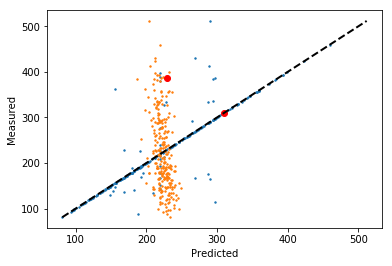

In [21]:
plt.show()

# 預測連續數值2(SVR)

In [360]:
from sklearn import datasets
from sklearn.svm import SVR
import matplotlib.pyplot as plt

boston = datasets.load_boston()
x=np.array(myX)
y = np.array(myY)

In [361]:
clf = SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(x, y)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [362]:
# from sklearn.externals import joblib
# joblib.dump(clf,"./machine_SVR.pkl")

In [372]:
# clf=joblib.load("./machine_SVR.pkl")
# clf.fit(x, y)

newData=zscore([[int(j)for j in i.split("\t")] for i in """52	102316	0	49	2	4	2	0
56	178949	12	125	5	8	5	3
58	185640	39	132	3	5	3	1
67	373797	11	229	31	16	2	3
70	353804	11	252	30	14	4	2
51	106274	7	39	1	2	2	0
60	185182	42	134	3	5	4	1
52	303312	7	119	7	6	1	0
65	342102	20	151	13	11	3	2""".split('\n')])

newdata=[]
for i in range(len(newData[0])):
    newdata.append(zscore(np.array(newData).T[i]))
newData=np.array(newdata).T

#連續型Y 產生
Y=[i['avgDailyCustomer'] for i in data]




#消費力	人口數	公車站數	四大超商數	星巴克數	麥當勞數	肯德基數	瓦城數



predict_y=clf.predict(newData)
# predict_y=clf.predict([x[205]])
predict_y

array([264.76833904, 274.47210065, 259.22482388, 402.2562006 ,
       307.87913706, 296.43918681, 274.96413344, 192.30027457,
       431.55854466])

In [364]:
predict=clf.predict(x)
clf.score(x, y)

0.7902633866801508

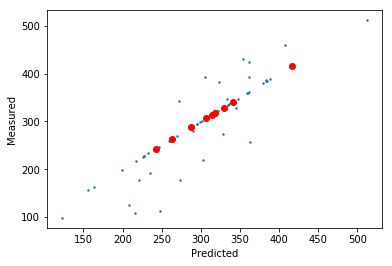

In [366]:
plt.scatter(predict,y,s=2)
plt.plot(predict_y, predict_y, 'ro')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.show()

# 特徵選擇器Pipeline Anova SVM

#### 此機器學習範例示範佇列的使用，依照順序執行ANOVA挑選主要特徵，並且使用C-SVM來計算特徵的權重與預測。


In [373]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline



# import some data to play with(20個特徵變數，其中3個特徵有意義、4個類別)
X, y = samples_generator.make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=4,
    n_clusters_per_class=2)
print(X.shape,"\n",X)
print(len(y),"\n",y)


# sklearn.datasets.make_classification(   n_samples=100,
#                                         n_features=20,
#                                         n_informative=2,
#                                         n_redundant=2,
#                                         n_repeated=0,
#                                         n_classes=2,
#                                         n_clusters_per_class=2,    
#                                         weights=None,
#                                         flip_y=0.01,
#                                         class_sep=1.0,
#                                         hypercube=True,
#                                         shift=0.0,
#                                         scale=1.0,
#                                         shuffle=True,
#                                         random_state=None)

# 參數:
# n_samples : 產生幾個數據
# n_fratures : 總特徵數目
# n_informative: 有意義的特徵數目
# n_redundant : 產生有意義特徵的隨機線性組合
# n_repeated
# n_classes: 共分類為幾類
# n_clusters_per_class: 一個類群有幾個群組分布
# weights :
# flip_y :
# class_sep :
# hypercube :
# shift :
# scale :
# shuffle :
# random_state :

# 輸出:
# X : 特徵矩陣資料
# Y : 對應目標資料

(100, 20) 
 [[-2.54937851 -0.58709228  0.39188949 ... -2.63056931 -0.32447045
   1.78439024]
 [ 0.40445055  0.90844646 -0.20829952 ... -1.98046834 -0.36818248
  -1.13580096]
 [ 0.38877715 -0.05073595  1.53453214 ... -1.51356552  1.20786155
  -1.90083685]
 ...
 [ 0.85041222  0.72363725 -1.2991601  ... -1.27833109  1.06788334
   0.90096975]
 [ 0.21483367  1.43530764  1.48253564 ... -1.57622211 -1.67915563
  -0.30558895]
 [-0.4019354  -0.89299684 -1.20451834 ...  0.26415119 -1.40523927
   0.16733032]]
100 
 [0 1 1 2 2 0 1 1 3 0 3 0 3 1 0 2 2 0 0 2 3 1 2 0 3 3 3 1 3 0 0 1 1 3 1 1 1
 0 2 2 2 0 0 2 1 0 2 3 1 0 0 2 2 3 1 3 0 0 3 3 0 2 3 3 3 0 2 0 3 1 0 1 3 2
 3 3 1 2 1 3 1 3 1 2 1 2 1 0 2 1 2 2 2 1 3 3 2 0 0 2]


In [374]:
#產生anova篩選器、找到最有效果的特徵 k個
anova_filter = SelectKBest(f_regression, k=5)

# SelectKBest() 的參數
# SelectKBest 的使用:

# 選擇最好的特徵(目標函式, 特徵個數)
# 目標函式: 測試X與Y之間關係，須提供F score與p-value
# 特徵個數: 最好的特徵個數
# f_regression 的使用：

# f_regression(X,y)
# 輸入X與y
# 輸出F score與p-value

In [375]:
#將SVC分類器加入anova的篩選機制，並做出會篩選出重要特徵3個的SVC模型
clf = svm.SVC(kernel='linear')

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X, y)
anova_svm.predict(X)
len([i for i in anova_svm.predict(X)==y if i ==True])/len(X)

0.85

In [376]:
anova_svm.fit(myX, myY2)
anova_svm.predict(myX)
len([i for i in anova_svm.predict(myX)==myY2 if i ==True])/len(myX)

0.46774193548387094

# 特徵選擇/範例二: Recursive feature elimination

#### 本範例主要目的是減少特徵數量來提升機器學習之預測準確度。 主要方法是去不斷去剔除與資料分類關係轉少之特徵，來篩選特徵數目至指定數目。

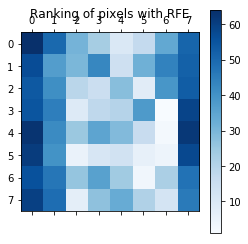

In [377]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)

#RFE以排除最不具目標影響力的特徵，做特徵的影響力排序。並且將訓練用的特徵挑選至n_features_to_select所給定的特徵數。
#step代表每次刪除較不具影響力的特徵數目
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)

#可以用方法ranking_來看輸入的特徵權重關係
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [378]:
YY=X.reshape((len(X),8,8))
print(YY.shape)
YY.reshape((len(YY),-1)).shape #只要reshape (資料數量,-1)就能將裡面資料的為度展開唯一

(1797, 8, 8)


(1797, 64)

# 自動特徵樹選擇 Recursive feature elimination with cross-validation

##### kfold做交叉驗證

Optimal number of features : 2


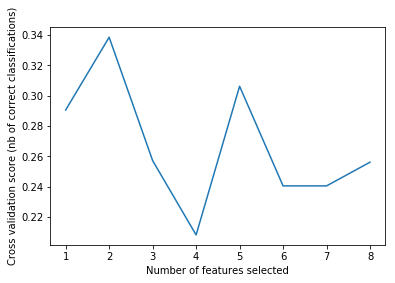

In [379]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

#有25個特徵變數、但只有3個有效>有8類
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)



# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications


#在交叉驗證的部分，我們使用StratifiedKFold指令來做K 堆疊(Fold)的交叉驗證。
#也就是將資料分為K堆，一堆作為預測用，剩下的(K-1)堆則用來訓練，經過計算後，再以另外一堆作為預測，重複K次。

#而scoring參數則是依照分類資料的形式，輸入對應的評分方式。以本例子為超過兩類型的分類，因此使用'accuracy'來對多重分類的評分方式

# rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
#               scoring='accuracy')
# rfecv.fit(X, y)


rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(myY2, n_folds=2),
              scoring='accuracy')
rfecv.fit(myX, myY2)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [380]:
len([i for i in rfecv.predict(myX)==myY2 if i ==True])/len(myX)

0.4032258064516129

# 替分類器打分數
### permutation_test_score提供了對分類標籤做隨機置換的功能，並依照給定的置換次數來計算不同的資料組合配上置換過標籤的組合，用交叉驗證來計算準確性分佈，並統計顯著性。計算過後可取得該分類機器的真實分數與經過數次組合後取得的分數。

Classification score 0.25625 (pvalue : 0.801980198019802)


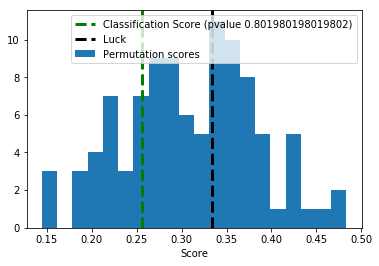

In [391]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold, permutation_test_score
from sklearn import datasets


##############################################################################
# Loading a dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_classes = np.unique(myY2).size

# Some noisy data not correlated
random = np.random.RandomState(seed=0)
E = random.normal(size=(len(myX), 2200))

# Add noisy data to the informative features for make the task harder
X = np.c_[myX, E]

svm = SVC(kernel='linear')
cv = StratifiedKFold(myY2, 2)

# score, permutation_scores, pvalue = permutation_test_score(
#     svm, X, y, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)
score, permutation_scores, pvalue = permutation_test_score(
    svm, myX, myY2, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)
print("Classification score %s (pvalue : %s)" % (score, pvalue))

###############################################################################
# View histogram of permutation scores
plt.hist(permutation_scores, 20, label='Permutation scores')
ylim = plt.ylim()
# BUG: vlines(..., linestyle='--') fails on older versions of matplotlib
#plt.vlines(score, ylim[0], ylim[1], linestyle='--',
#          color='g', linewidth=3, label='Classification Score'
#          ' (pvalue %s)' % pvalue)
#plt.vlines(1.0 / n_classes, ylim[0], ylim[1], linestyle='--',
#          color='k', linewidth=3, label='Luck')
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

# 使用f-value作為判斷的基準來找主要影響力特徵
#### 以SelectPercentile作單變量特徵的計算，以F-test(f_classif)來做為選擇的統計方式，挑選函式輸出結果大於百分之十的特徵。並將計算出來的單便量特徵分數結果做正規化，以便比較每特徵在使用單變量計算與未使用單變量計算的差別。

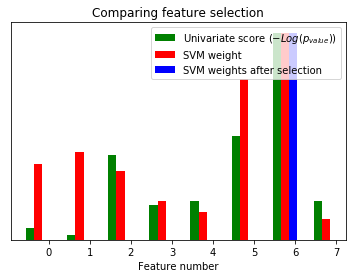

In [405]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

###############################################################################
# # import some data to play with

# # The iris dataset
# iris = datasets.load_iris()

# # Some noisy data not correlated
# E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

# # Add the noisy data to the informative features
# X = np.hstack((iris.data, E))
# y = iris.target

###############################################################################
plt.figure(1)
plt.clf()

X_indices = np.arange(myX.shape[-1])

###############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(myX, myY2)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

###############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(myX, myY2)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(myX), myY2)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# Decision Tree Regression

#### 此範例利用Decision Tree從數據中學習一組if-then-else決策規則，逼近加有雜訊的sine curve，因此它模擬出局部的線性迴歸以近似sine curve。 若決策樹深度越深(可由max_depth參數控制)，則決策規則越複雜，模型也會越接近數據，但若數據中含有雜訊，太深的樹就有可能產生過擬合的情形。 此範例模擬了不同深度的樹，當用帶有雜點的數據可能造成的情況。
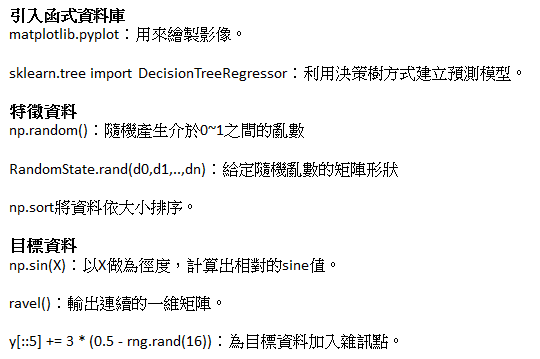

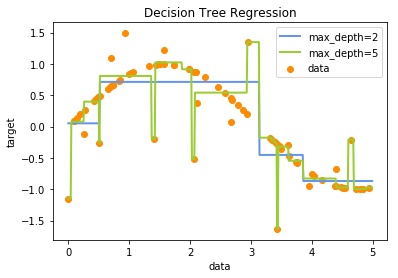

In [442]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 決策樹/範例二:Multi-output Decision Tree Regression

#### 此範例用決策樹說明多輸出迴歸的例子，利用帶有雜訊的特徵及目標值模擬出近似圓的局部線性迴歸。 若決策樹深度越深(可由max_depth參數控制)，則決策規則越複雜，模型也會越接近數據，但若數據中含有雜訊，太深的樹就有可能產生過擬合的情形。 此範例模擬了不同深度的樹，當用帶有雜點的數據可能造成的情況。

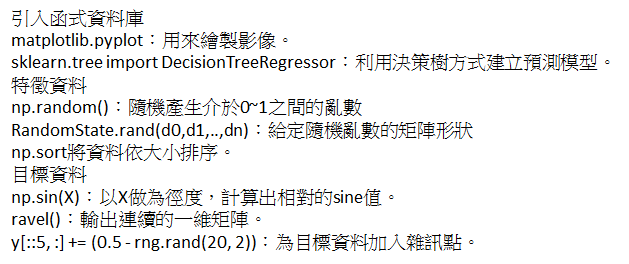

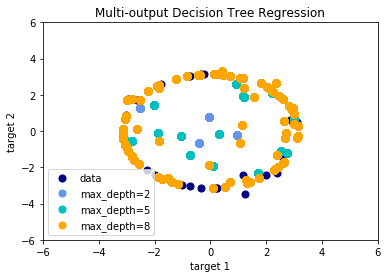

In [450]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset

rng = np.random.RandomState(1)


X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 50
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="c", s=s, label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s, label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend()
plt.show()